In [71]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import numpy as np

In [72]:
REPO_PATH = os.path.join(os.path.dirname(os.getcwd()))
sys.path.insert(0, REPO_PATH)
from settings import DATA_DIR_PATH

df = pd.read_csv(os.path.join(DATA_DIR_PATH, "raw/adult.csv"), na_values=["?"])

In [73]:
# Missing report
(df.isna().mean()*100).sort_values(ascending=False)

occupation         5.751198
workclass          5.730724
native-country     1.754637
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
age                0.000000
marital-status     0.000000
relationship       0.000000
gender             0.000000
race               0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
income             0.000000
dtype: float64

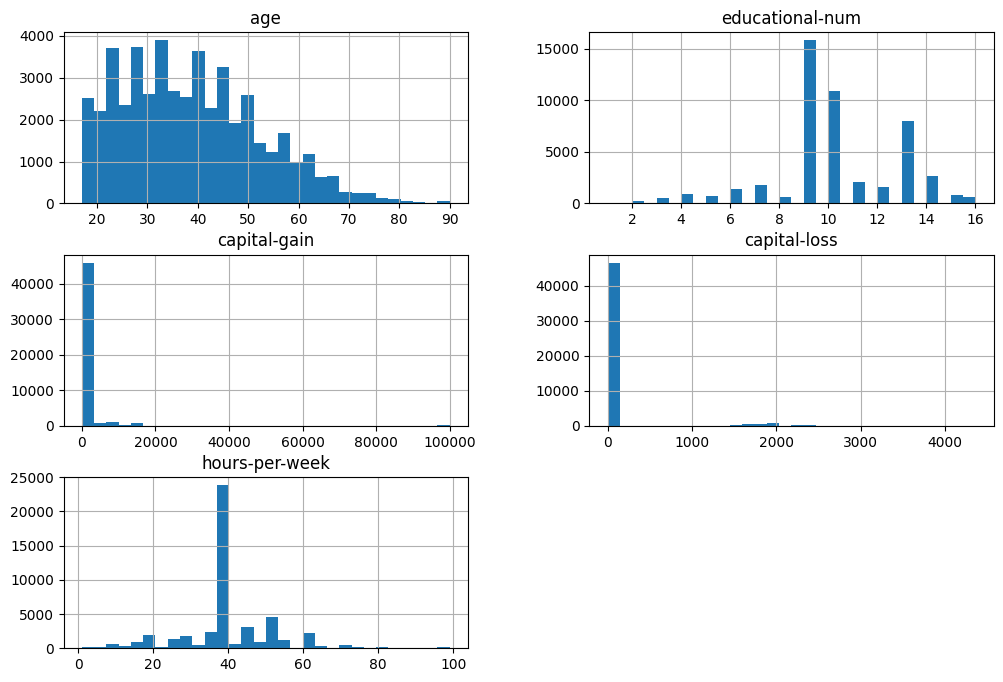

In [74]:
# Histogram for numeric columns
num_cols = ["age","educational-num","capital-gain","capital-loss","hours-per-week"]
df[num_cols].hist(bins=30, figsize=(12,8))
plt.show()


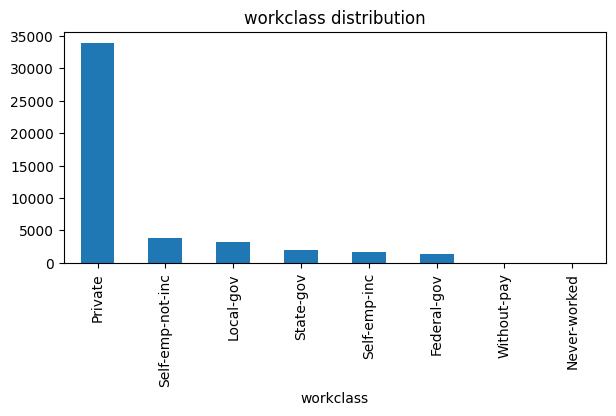

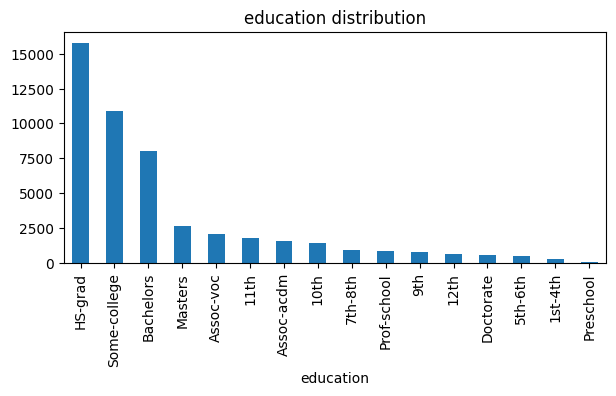

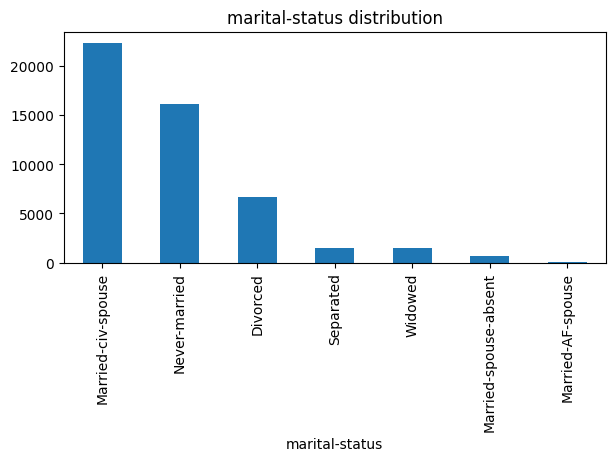

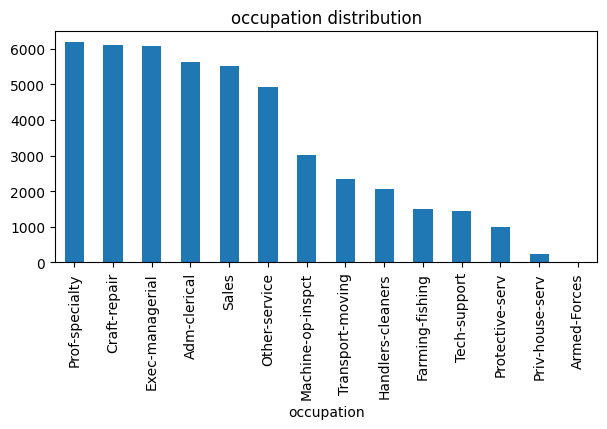

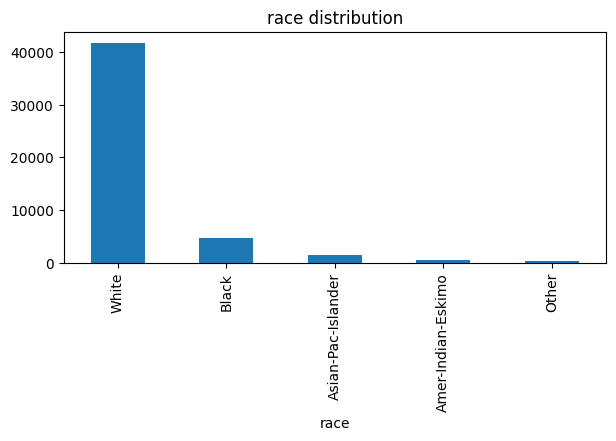

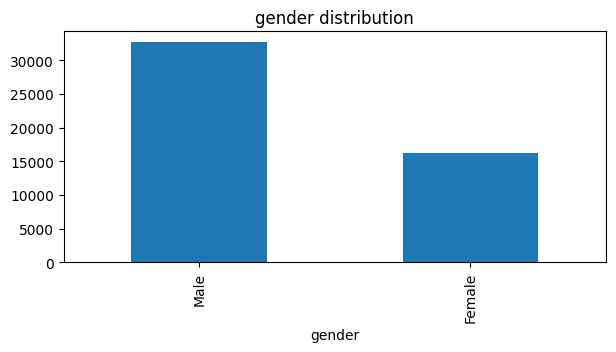

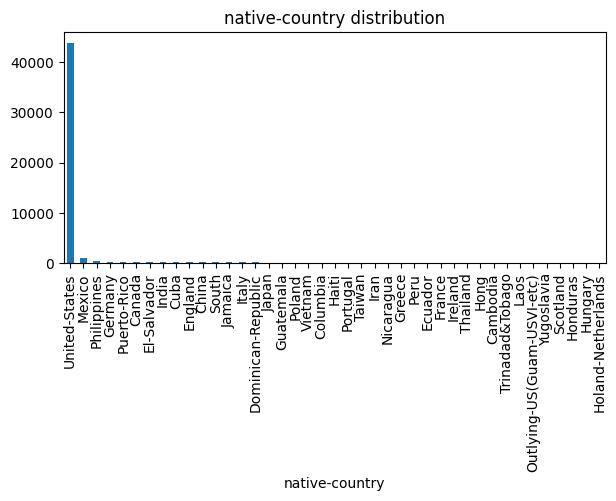

In [75]:
# Categorical features distribution
cat_cols = ["workclass","education","marital-status","occupation","race","gender","native-country"]
for c in cat_cols:
    ax = df[c].value_counts().plot(kind="bar", figsize=(7,3), title=f"{c} distribution")
    plt.show()

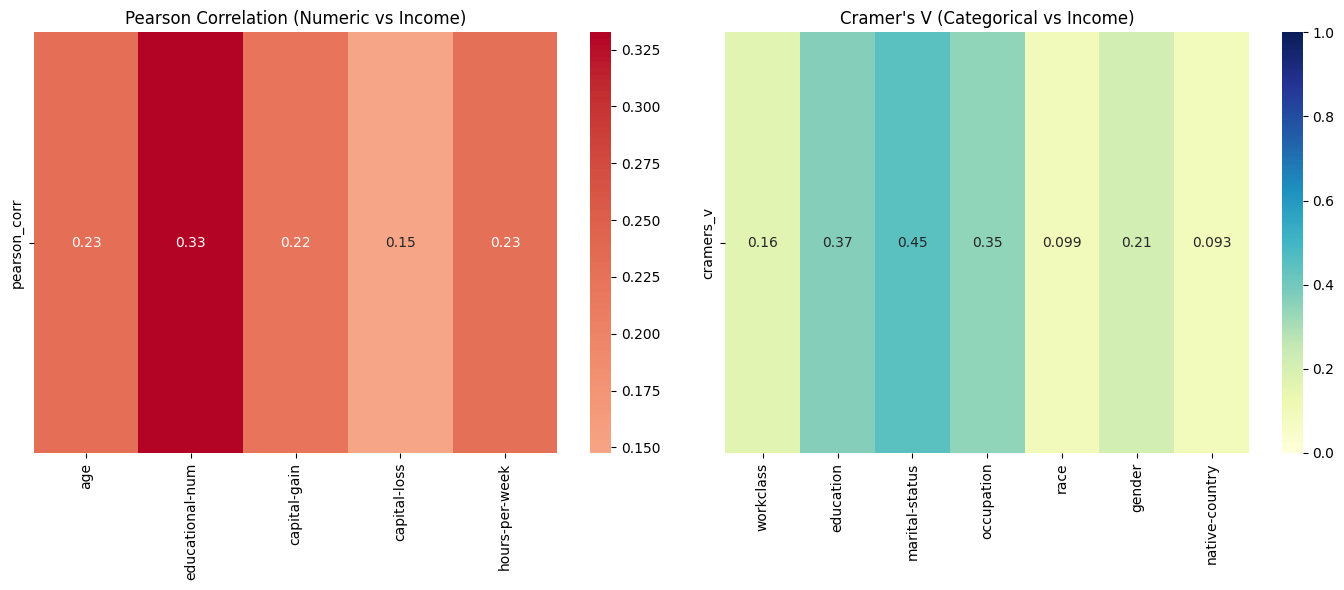

In [76]:
# Calculate and visualize correlation for both numeric and categorical features vs income column (our target column)

target_col = "income"

# Pearson correlation for numeric features
pearson_results = {}
for col in num_cols:
    corr, pval = pearsonr(df[col], df[target_col].astype('category').cat.codes)  
    pearson_results[col] = {"pearson_corr": corr}

pearson_df = pd.DataFrame(pearson_results).T

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Cramér’s V for categorical features
cramers_results = {}
for col in cat_cols:
    cv = cramers_v(df[col], df[target_col])
    cramers_results[col] = {"cramers_v": cv}

cramers_df = pd.DataFrame(cramers_results).T

# Plot
plt.figure(figsize=(14, 6))

# Pearson correlations
plt.subplot(1, 2, 1)
sns.heatmap(pearson_df.T, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Pearson Correlation (Numeric vs Income)")

# Cramer's V
plt.subplot(1, 2, 2)
sns.heatmap(cramers_df.T, annot=True, cmap="YlGnBu", cbar=True, vmin=0, vmax=1)
plt.title("Cramer's V (Categorical vs Income)")

plt.tight_layout()
plt.show()


In [77]:
CAT_COLS = ["workclass","education","marital-status","occupation",
            "relationship","race","gender","native-country"]
NUM_COLS = ["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]
TARGET   = "income"

# Or using ydata profiling

In [78]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Adult EDA", explorative=True)
profile.to_file(os.path.join(DATA_DIR_PATH, "processed/adult_eda.html"))


Summarize dataset:  45%|████▍     | 26/58 [00:01<00:01, 19.72it/s, scatter educational-num, fnlwgt]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 426.99it/s]
